In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
gold_price_df=pd.read_csv("Gold Price.csv")
gold_price_df

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [2]:
gold_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [3]:
gold_price_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
gold_price_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_price_df = gold_price_df.drop(['Date'], axis=1)
gold_price_df

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
correlation = gold_price_df.corr()
correlation


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

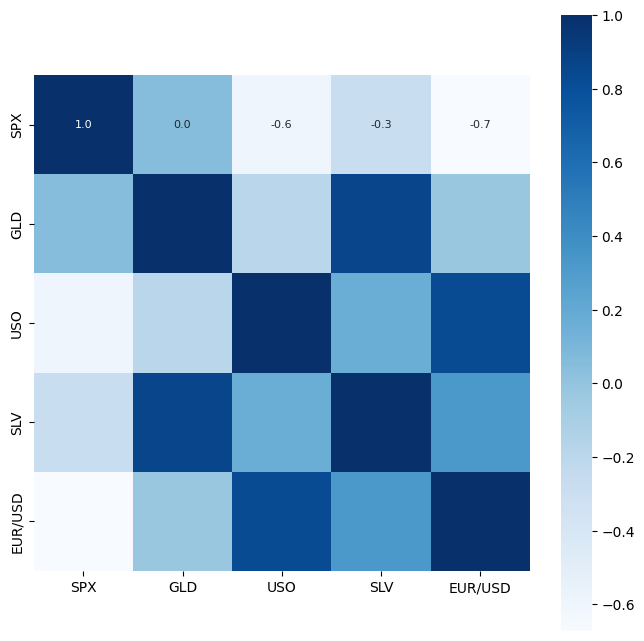

In [7]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [8]:
X = gold_price_df.drop(columns = ['GLD'], axis=1) 
y = gold_price_df['GLD']

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [10]:
standardized_data = scaler.transform(X)
standardized_data

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]])

In [11]:
X = standardized_data
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [12]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,6.119079,69.199813,8.318642,0.871706
Lasso,6.397819,72.040885,8.487690,0.866439
Ridge,6.121224,69.186689,8.317854,0.871731
SVR,3.339882,30.362571,5.510224,0.943709
Decision Tree Regressor,1.669052,13.324665,3.650297,0.975297
Random Forest Regressor,1.318235,5.685701,2.384471,0.989459
